In [36]:
import jieba
import pandas as pd
import numpy as np

In [37]:
### 数据源：http://www.sogou.com/labs/resource/ca.php ###
file = '/Users/joey/Documents/PycharmProjects/mywork/bayesian_algorithm/val.txt'
df_news = pd.read_table(file, names=['category', 'theme', 'URL', 'content'], encoding= 'utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [38]:
df_news.shape

(5000, 4)

In [39]:
# 示例
dt = pd.DataFrame([[1,23,4,45],[3,4,5,2,]],columns=['a','b','c','d'])
dt

,a,b,c,d
0,1,23,4,45
1,3,4,5,2


In [40]:
dt.b.values.tolist()[0]

23

In [41]:
# 分词
# tolist() 数组或矩阵转为列表
content = df_news.content.values.tolist()
print(content[0])

经销商　电话　试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常叮００万９阒菔邪自魄白云大道北１３６１号；广州市天河区黄埔大道西１００号富力盈泰大厦１０５室４００８－１１２２３３转９９１５＃保常福００万Ｉ蕉省淄博市张店区山泉路８９号４００８－１１２２３３转５１５６＃保常叮００万４罅保税区黄海西三路１０１号４００８－１１２２３３转２６０３＃保玻埃００万Ｌ粕绞新纺锨复兴路２１号４００８－１１２２３３转３０４３＃保常叮００万Ｖ泄云南昆明市度假区滇池路１２６８号４００８－１１２２３３转７３１２＃保常叮００万Ｒ川市兴庆区丽景北街８００号４００８－１１２２３３转３２６９＃保常叮００万９尔滨市道外区先锋路４６９号４００８－１１２２３３转２０２９＃保矗福００万３ど呈刑煨那桂花坪街道雀园路口／星沙中南汽车世界Ａ区０５号４００８－１１２２３３转７６６６＃保常梗００万Ｎ浜菏信塘城经济开发区盘龙汽车城＃矗埃埃福１１２２３３转７５２４＃保常叮００万９阒莘禺区市广路９８９号（祈福食街旁）＃矗埃埃福１１２２３３转９９６３＃保常叮００万Ｆ侄新区御桥路１３７７号４００８－１１２２３３转６３３７＃保常福００万０不帐『戏适邪河工业区纬一路２２号１３８．００万Ｉ虾Ｊ斜ι角江杨南路１３８１号４００８－１１２２３３转６７２２＃保常叮００万ｔ奚蕉路１９８号４００８－１１２２３３转５９３３＃保常叮００万１本┦谐阳区北四环望京街６８号４００８－１１２２３３转８６１５＃保玻福００万１本┦胁平区立汤路亚北博晟汽车汇展中心＃保埃福８６万＝西省南昌市青山湖区科技大道５９９号１３６．００万Ｉ苄耸信劢工业区康宁路车管所对面＃保常叮００万Ｄ暇┦薪宁区天元中路１１１号４００８－１１２２３３转５５０１＃保常叮００万３ご菏形餍戮济技术开发区长沈路４２２２号１３６．００万Ｊ家庄市北二环东路８６号河北国际汽车贸易园区＃矗埃埃福１１２２３３转３１７８＃保矗福００万８壅⑶城港路９９号广达车城永兴路３号１３６．００万Ｉ蜓羰刑西区北二中路１１号４００８－１１２２３３转２４９８＃保常叮００万３啥际星嘌虼蟮溃保福负牛ㄐ挛幕宫对面）＃保矗常８０万Ａ赡省沈阳市皇姑区鸭绿江街３２号甲（长客总站北行１５００米）＃保矗福００万Ｉ钲谑新藓区罗芳立交六星汽车园进口大众４Ｓ店４００８－１１２２３３转９８６６＃保担埃００万３ご憾环城路１００

In [42]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line) # current_segment - list
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment) # list of list

In [43]:
print(content_S[0: 2])

[['经销商', '\u3000', '电话', '\u3000', '试驾', '／', '订车', 'Ｕ', '憬', '杭州', '滨江区', '江陵', '路', '１', '７', '８', '０', '号', '４', '０', '０', '８', '－', '１', '１', '２', '２', '３', '３', '转', '５', '８', '６', '４', '＃', '保常', '叮', '０', '０', '万', '９', '阒', '菔', '邪', '自魄', '白云', '大道北', '１', '３', '６', '１', '号', '；', '广州市', '天河区', '黄埔', '大道', '西', '１', '０', '０', '号', '富力', '盈泰', '大厦', '１', '０', '５', '室', '４', '０', '０', '８', '－', '１', '１', '２', '２', '３', '３', '转', '９', '９', '１', '５', '＃', '保常福', '０', '０', '万', 'Ｉ', '蕉', '省', '淄博市', '张店区', '山泉', '路', '８', '９', '号', '４', '０', '０', '８', '－', '１', '１', '２', '２', '３', '３', '转', '５', '１', '５', '６', '＃', '保常', '叮', '０', '０', '万', '４', '罅', '保税区', '黄海', '西', '三路', '１', '０', '１', '号', '４', '０', '０', '８', '－', '１', '１', '２', '２', '３', '３', '转', '２', '６', '０', '３', '＃', '保玻埃', '０', '０', '万', 'Ｌ', '粕', '绞', '新', '纺锨', '复兴路', '２', '１', '号', '４', '０', '０', '８', '－', '１', '１', '２', '２', '３', '３', '转', '３', '０', '４', '３', '＃', '保常', '叮', '０', '０', '万', 'Ｖ', '泄', '云南', '昆明市', '度假区

In [44]:
df_content = pd.DataFrame({'content_S': content_S}) # list
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [45]:
file1 = '/Users/joey/Documents/PycharmProjects/mywork/bayesian_algorithm/stopwords.txt'
stopwords = pd.read_csv(file1, index_col=False, sep='\t', quoting=3, names=['stopword'], encoding='utf-8')
stopwords.head()

# quoting : int or csv.QUOTE_* instance, default 0
#     Control field quoting behavior per ``csv.QUOTE_*`` constants. Use one of
#     QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).
# 当文本文件中带有英文双引号时，直接用pd.read_csv进行读取会导致行数减少，
# 此时应该对read_csv设置参数quoting=3或者quoting=csv.QUOTE_NONE

,stopword
0,!
1,""""
2,#
3,$
4,%


In [46]:
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word) # list
            all_words.append(str(word))
        contents_clean.append(line_clean) # list of list
    return contents_clean, all_words


In [47]:
raw_contents = df_content.content_S.values.tolist() # list of list
raw_stopwords = stopwords.stopword.values.tolist() # list
contents_clean, all_words = drop_stopwords(raw_contents,raw_stopwords)

In [48]:
len(all_words)

993928

In [49]:
df_content = pd.DataFrame({'contents_clean': contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [50]:
df_all_words = pd.DataFrame({'all_words': all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [51]:
# words_count = df_all_words.groupby('all_words').agg({'counts': 'np.size'})
# SpecificationError: nested renamer is not supported

df_all_words.loc[:,'count'] = 1
df_all_words.head()

,all_words,count
0,经销商,1
1,电话,1
2,试驾,1
3,订车,1
4,Ｕ,1


In [52]:
words_count = df_all_words.groupby('all_words').agg({'count': 'count'})
# words_count = df_all_words.groupby('all_words').agg({'all_words': 'count'})
words_count = words_count.reset_index().sort_values(by=['count'], ascending=False)
words_count.head()

,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


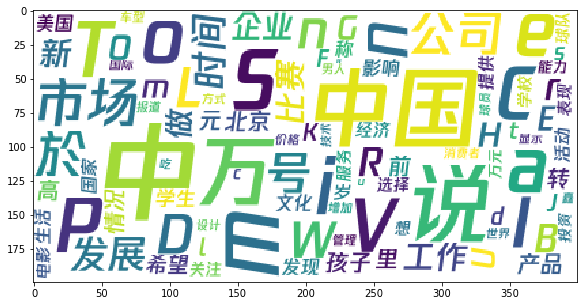

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
font = '/Users/joey/Library/Fonts/TT-Me.ttf'
wordcloud = WordCloud(font_path=font, background_color='white', max_font_size=80)
word_frequence = {x[0]: x[1] for x in words_count.head(100).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
# wordcloud.generate_from_frequencies(word_frequence)
# wordcloud.to_file('a.png')    

### TF-IDF : 提取关键词

In [54]:
import jieba.analyse
index = 2400
print(df_news['content'][index])

法国ＶＳ西班牙、里贝里ＶＳ哈维，北京时间６月２４日凌晨一场的大战举世瞩目，而这场胜利不仅仅关乎两支顶级强队的命运，同时也是他们背后的球衣赞助商耐克和阿迪达斯之间的一次角逐。Ｔ谌胙”窘炫分薇的１６支球队之中，阿迪达斯和耐克的势力范围也是几乎旗鼓相当：其中有５家球衣由耐克提供，而阿迪达斯则赞助了６家，此外茵宝有３家，而剩下的两家则由彪马赞助。而当比赛进行到现在，率先挺进四强的两支球队分别被耐克支持的葡萄牙和阿迪达斯支持的德国占据，而由于最后一场１／４决赛是茵宝（英格兰）和彪马（意大利）的对决，这也意味着明天凌晨西班牙同法国这场阿迪达斯和耐克在１／４决赛的唯一一次直接交手将直接决定两家体育巨头在此次欧洲杯上的胜负。８据评估，在２０１２年足球商品的销售额能总共超过４０亿欧元，而单单是不足一个月的欧洲杯就有高达５亿的销售额，也就是说在欧洲杯期间将有７００万件球衣被抢购一空。根据市场评估，两大巨头阿迪达斯和耐克的市场占有率也是并驾齐驱，其中前者占据３８％，而后者占据３６％。体育权利顾问奥利弗－米歇尔在接受《队报》采访时说：“欧洲杯是耐克通过法国翻身的一个绝佳机会！”Ｃ仔尔接着谈到两大赞助商的经营策略：“竞技体育的成功会燃起球衣购买的热情，不过即便是水平相当，不同国家之间的欧洲杯效应却存在不同。在德国就很出色，大约１／４的德国人通过电视观看了比赛，而在西班牙效果则差很多，由于民族主义高涨的加泰罗尼亚地区只关注巴萨和巴萨的球衣，他们对西班牙国家队根本没什么兴趣。”因此尽管西班牙接连拿下欧洲杯和世界杯，但是阿迪达斯只为西班牙足协支付每年２６００万的赞助费＃相比之下尽管最近两届大赛表现糟糕法国足协将从耐克手中每年可以得到４０００万欧元。米歇尔解释道：“法国创纪录的４０００万欧元赞助费得益于阿迪达斯和耐克竞逐未来１５年欧洲市场的竞争。耐克需要笼络一个大国来打赢这场欧洲大陆的战争，而尽管德国拿到的赞助费并不太高，但是他们却显然牢牢掌握在民族品牌阿迪达斯手中。从长期投资来看，耐克给法国的赞助并不算过高。”


In [55]:
content_S_str = ''.join(contents_clean[2400])
content_S_str

'法国ＶＳ西班牙里贝里ＶＳ哈维北京时间凌晨一场大战举世瞩目这场胜利关乎两支顶级强队命运背后球衣赞助商耐克阿迪达斯之间角逐Ｔ谌胙窘炫分薇支球队之中阿迪达斯耐克势力范围旗鼓相当家球衣耐克提供阿迪达斯赞助家茵宝家剩下两家彪马赞助比赛率先挺进四强两支球队耐克支持葡萄牙阿迪达斯支持德国占据一场决赛是茵宝英格兰彪马意大利对决意味着明天凌晨西班牙法国这场阿迪达斯耐克决赛唯一交手两家体育巨头欧洲杯胜负评估足球商品销售额总共超过亿欧元单单是一个月欧洲杯高达亿销售额欧洲杯期间万件球衣抢购一空市场评估两大巨头阿迪达斯耐克市场占有率并驾齐驱占据占据体育权利顾问奥利弗米歇尔接受队报采访时说欧洲杯耐克法国翻身绝佳机会Ｃ仔尔谈到两大赞助商经营策略竞技体育成功燃起球衣购买热情水平国家之间欧洲杯效应德国出色德国人电视观看比赛西班牙效果差民族主义高涨加泰罗尼亚地区关注巴萨巴萨球衣西班牙国家队没什么兴趣西班牙接连拿下欧洲杯世界杯阿迪达斯西班牙足协支付万赞助费相比之下两届大赛表现糟糕法国足协耐克手中万欧元米歇尔解释道法国创纪录万欧元赞助费得益于阿迪达斯耐克竞逐未来欧洲市场竞争耐克笼络大国打赢这场欧洲大陆战争德国拿到赞助费不太高民族品牌阿迪达斯手中长期投资耐克法国赞助不算过高'

In [56]:
# 选择特征
print(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False))

['耐克', '阿迪达斯', '欧洲杯', '球衣', '西班牙']


### LDA : 主题模型
格式要求：list of list形式，分词好的整个语料

In [57]:
# 自然语言处理
from gensim import corpora, models, similarities
import gensim

In [58]:
dic = [['我们','不能','不能','不能'],['这样','走掉'],['我们','不能'],['我们','墨迹','不能']]
dictionary = corpora.Dictionary(dic)

In [59]:
corpus = [dictionary.doc2bow(sentence) for sentence in dic]
corpus

[[(0, 3), (1, 1)],
 [(2, 1), (3, 1)],
 [(0, 1), (1, 1)],
 [(0, 1), (1, 1), (4, 1)]]

In [60]:
# 做映射，相当于词袋
# 文本特征向量转化模块
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]
# corpus 语料库

In [61]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20)

In [62]:
# 1号的分类结果展示
lda.print_topic(1, topn=5)

'0.016*"导演" + 0.016*"电影" + 0.009*"影片" + 0.008*"爱情" + 0.008*"票房"'

In [63]:
# 20个分类结果
for topic in lda.print_topics(num_topics=20, num_words=5):
    print(topic)


(0, '0.007*"中" + 0.006*"说" + 0.004*"节目" + 0.003*"Ｈ" + 0.003*"中国"')
(1, '0.016*"导演" + 0.016*"电影" + 0.009*"影片" + 0.008*"爱情" + 0.008*"票房"')
(2, '0.014*"饰演" + 0.009*"中" + 0.007*"比赛" + 0.006*"ｍ" + 0.005*"ｅ"')
(3, '0.008*"Ｓ" + 0.005*"Ｖ" + 0.004*"中" + 0.004*"导演" + 0.004*"电影"')
(4, '0.005*"ａ" + 0.004*"张绍" + 0.003*"产品" + 0.003*"元" + 0.003*"中"')
(5, '0.006*"中" + 0.005*"教育" + 0.004*"工作" + 0.004*"发展" + 0.003*"中国"')
(6, '0.007*"官兵" + 0.006*"工作" + 0.006*"说" + 0.005*"部队" + 0.005*"中"')
(7, '0.009*"中国" + 0.007*"中" + 0.004*"号" + 0.004*"奥运" + 0.003*"万"')
(8, '0.014*"ａ" + 0.013*"ｅ" + 0.010*"ｏ" + 0.010*"ｎ" + 0.010*"中"')
(9, '0.005*"卫视" + 0.005*"出版" + 0.004*"万元" + 0.004*"身价" + 0.003*"Ｓ"')
(10, '0.007*"皮肤" + 0.007*"万" + 0.005*"号" + 0.005*"肌肤" + 0.004*"转"')
(11, '0.010*"说" + 0.009*"男人" + 0.009*"中" + 0.008*"女人" + 0.005*"做"')
(12, '0.014*"男人" + 0.013*"孩子" + 0.007*"中" + 0.007*"老公" + 0.005*"女人"')
(13, '0.005*"男人" + 0.004*"女性" + 0.004*"中" + 0.003*"孩子" + 0.003*"离婚"')
(14, '0.013*"比赛" + 0.007*"恋情" + 0.006*"观众" + 0.0

### 贝叶斯分类


In [64]:
df_train = pd.DataFrame({'contents_clean': contents_clean, 'label': df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [65]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [66]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [67]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [68]:
x_train[0][1]

'上海'

In [69]:
# 转为str
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [70]:
print(len(words))

3750


In [71]:
# 特征选择
from sklearn.feature_extraction.text import CountVectorizer

# 不能是list-of-list格式,要list of str
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)
print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))
print(cv_fit)

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]
  (0, 2)	1
  (0, 1)	1
  (0, 3)	1
  (1, 2)	1
  (1, 1)	2
  (2, 3)	1
  (2, 0)	1
  (3, 0)	1


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4)) # 最大长度
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)


CountVectorizer(lowercase=False, max_features=4000)

In [74]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [75]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [76]:
classifier.score(vec.transform(test_words), y_test)

0.8032

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [78]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [79]:
classifier.score(vectorizer.transform(test_words), y_test)

0.8136

In [80]:
df_train = pd.DataFrame({'contents_clean': contents_clean, 'label': df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [81]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [82]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [83]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [84]:
x_train[0][1]

'上海'

In [85]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [86]:
print(len(words))

3750


In [87]:
# 特征选择
# 例子
from sklearn.feature_extraction.text import CountVectorizer

# 不能是list-of-list格式,要list of str
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)
print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))
print(cv_fit)

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]
  (0, 2)	1
  (0, 1)	1
  (0, 3)	1
  (1, 2)	1
  (1, 1)	2
  (2, 3)	1
  (2, 0)	1
  (3, 0)	1


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4)) # 取词长度为1到3,,维度
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)

CountVectorizer(lowercase=False, max_features=4000)

In [90]:
# MultinomialNB 朴素贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [91]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [92]:
classifier.score(vec.transform(test_words), y_test)

0.8032

In [93]:
# 将原始文档集合转换为TF-IDF特征矩阵。相当于CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [94]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [95]:
vectorizer

TfidfVectorizer(lowercase=False, max_features=4000)

In [96]:
classifier.score(vectorizer.transform(test_words), y_test)

0.8136